In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [28]:
#simple linear regression
X = df.drop(columns=['G3'])
y = df['G3']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 1.4954750100522758
MSE: 5.03239410886674
RMSE: 2.2432998258963823
R² score: 0.7545777855043501


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # perfect prediction line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

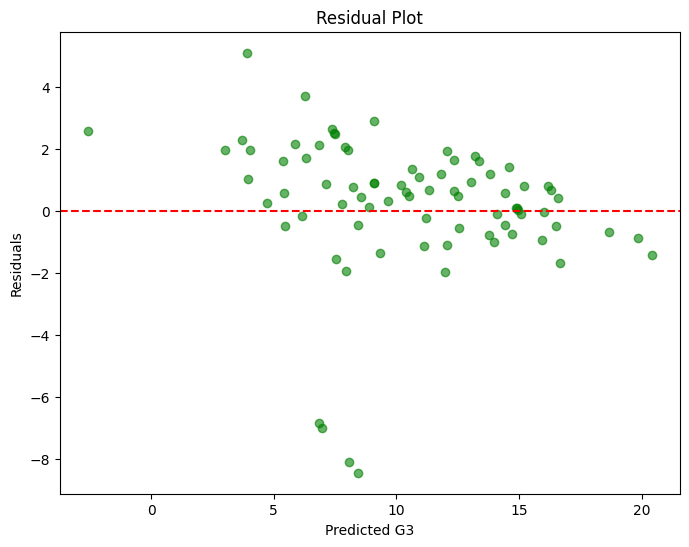

In [19]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted G3')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [27]:
#multiple linear regression
X = df.drop(columns=['G3'])
y = df['G3']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_multi = mlr.predict(X_test)

In [24]:
print("Multiple Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))
print("R² score:", r2_score(y_test, y_pred_multi))

Multiple Linear Regression Metrics:
MAE: 1.4954750100522758
MSE: 5.03239410886674
RMSE: 2.2432998258963823
R² score: 0.7545777855043501


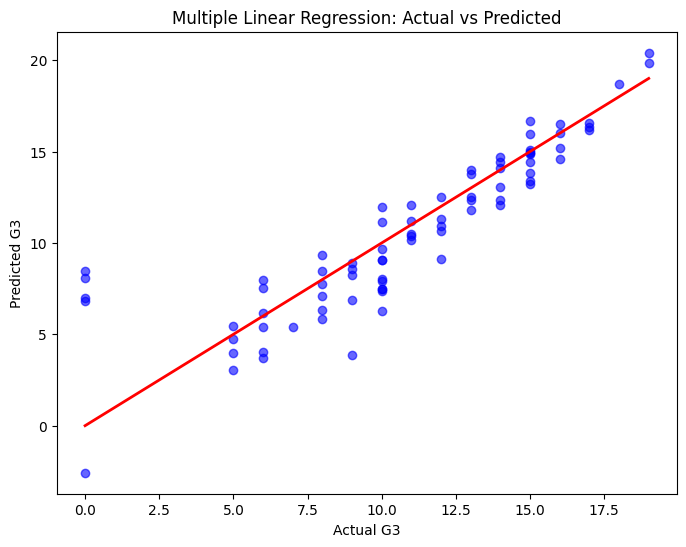

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

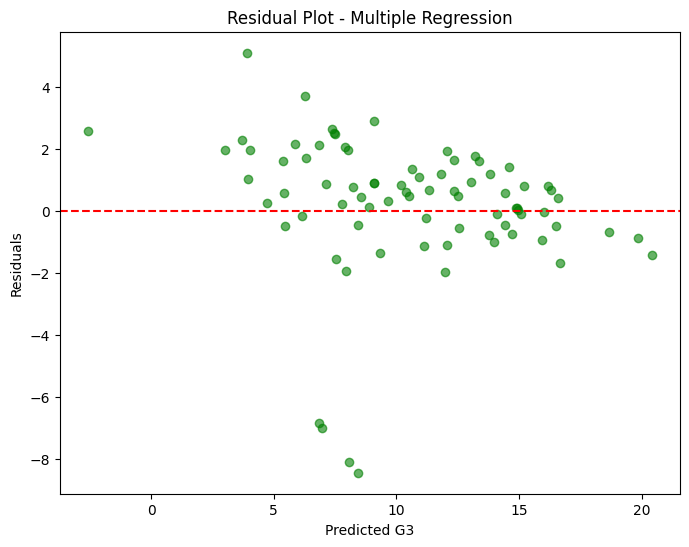

In [26]:
residuals_multi = y_test - y_pred_multi
plt.figure(figsize=(8,6))
plt.scatter(y_pred_multi, residuals_multi, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted G3')
plt.ylabel('Residuals')
plt.title('Residual Plot - Multiple Regression')
plt.show()

In [29]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

In [30]:
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

In [31]:
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
df_X = pd.DataFrame(X, columns=feature_names)
df_y = pd.Series(y, name='Target')

In [33]:
print(df_X.head())

   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4
0  -0.385314   0.199060  -0.600217   0.462103   0.069802
1   0.130741   1.632411  -1.430141  -1.247783  -0.440044
2  -0.773010   0.224092   0.012592  -0.401220   0.097676
3  -0.576771  -0.050238  -0.238948   0.270457  -0.907564
4  -0.575818   0.614167   0.757508  -0.220970  -0.530501


In [34]:
print(df_y.head())

0    -21.472141
1   -123.170063
2     13.108910
3    -66.411119
4     22.492692
Name: Target, dtype: float64


In [35]:
#simple linear
X_simple = df_X[['Feature_0']]
y_simple = df_y

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
print("Simple Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

Simple Linear Regression Metrics:
MAE: 79.09994647265484
MSE: 9307.784175038469
RMSE: 96.47685823573687
R² score: -0.07298891969738674


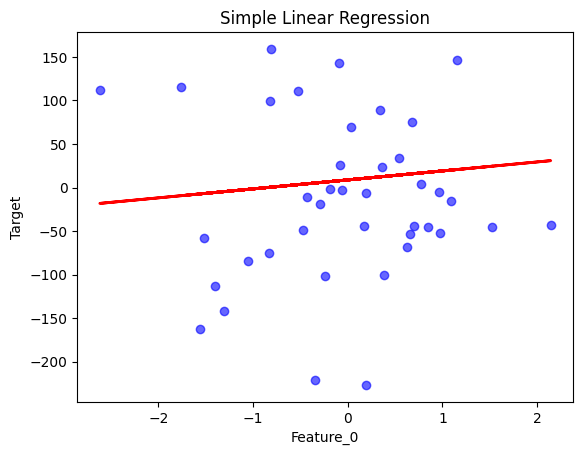

In [40]:
plt.scatter(X_test, y_test, color='blue', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Feature_0')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.show()

In [41]:
#multiple linear
X_multi = df_X
y_multi = df_y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [43]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_multi = mlr.predict(X_test)

In [45]:
print("\nMultiple Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))
print("R² score:", r2_score(y_test, y_pred_multi))


Multiple Linear Regression Metrics:
MAE: 7.738255222639107
MSE: 85.05836222825715
RMSE: 9.222709050396046
R² score: 0.9901945856841755


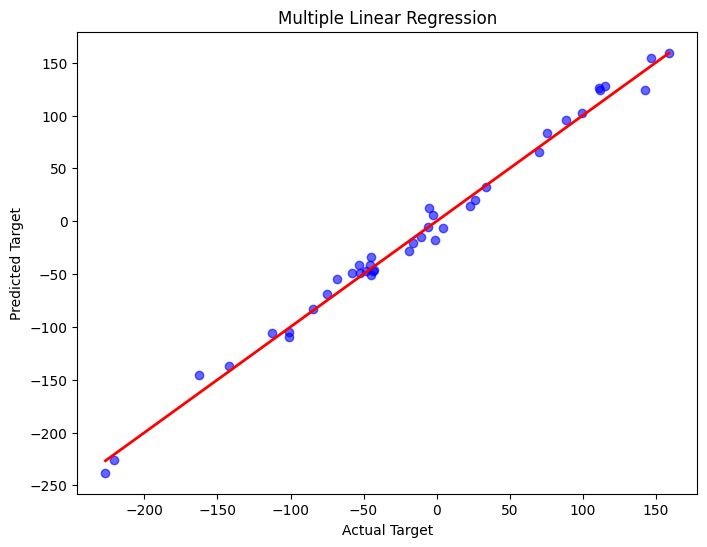

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Multiple Linear Regression')
plt.show()